
# Comprehensive Movie Data Analysis
# 1. Business Understanding

This notebook provides a structured approach to analyzing movie datasets to answer the business question:

**"What kinds of movies should a new studio produce for financial success?"**

We will proceed through the following sections:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Analysis
5. Visualization

**Objectives:**
- Analyze which genres are most profitable.
- Examine the relationship between production budget and revenue.
- Assess the impact of review scores on financial performance.

By integrating multiple movie datasets, we aim to provide actionable insights for new studios to maximize their chances of financial success.

**Import Required Libraries**

Import all necessary libraries for data manipulation, visualization, and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# 2. Data Understanding
**Load and Inspect Datasets**

Loading all provided datasets (CSV, TSV, SQLite) into pandas DataFrames. Displaying the first few rows and data types for each DataFrame. Printing the shape of each DataFrame to confirm successful loading.

In [2]:
# File paths
bom_path = r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\bom.movie_gross.csv'
tn_path = r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\tn.movie_budgets.csv'
tmdb_path = r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\tmdb.movies.csv'
rt_info_path = r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\rt.movie_info.tsv'
rt_reviews_path = r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\rt.reviews.tsv'
imdb_db_path = r'C:\Users\DAVID\Documents\Moringa\Phase2\Assessments\dsc-phase-2-project-PT11-Group4\Data\im.db'

# Load CSV/TSV files
df_bom = pd.read_csv(bom_path)
df_tn = pd.read_csv(tn_path, encoding='latin-1')
df_tmdb = pd.read_csv(tmdb_path)
df_rt_info = pd.read_csv(rt_info_path, sep='\t')
df_rt_reviews = pd.read_csv(rt_reviews_path,encoding='latin-1',sep='\t')

# Load SQLite tables
conn = sqlite3.connect(imdb_db_path)
df_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
df_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
conn.close()

# Inspect DataFrames
for name, df in [
    ("df_bom", df_bom), ("df_tn", df_tn), ("df_tmdb", df_tmdb),
    ("df_rt_info", df_rt_info), ("df_rt_reviews", df_rt_reviews),
    ("df_movie_basics", df_movie_basics), ("df_movie_ratings", df_movie_ratings)
]:
    print(f"{name}: shape={df.shape}")
    display(df.head())
    display(df.dtypes)

df_bom: shape=(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

df_tn: shape=(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

df_tmdb: shape=(26517, 10)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

df_rt_info: shape=(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

df_rt_reviews: shape=(54432, 8)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


id             int64
review        object
rating        object
fresh         object
critic        object
top_critic     int64
publisher     object
date          object
dtype: object

df_movie_basics: shape=(146144, 6)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

df_movie_ratings: shape=(73856, 3)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


movie_id          object
averagerating    float64
numvotes           int64
dtype: object

# 3. Data Preparation
**Cleaning and Preparing Data**

Handling missing values, removing duplicates, standardizing column names, and ensuring consistent data types. Converting relevant columns to numeric or datetime as needed. Addressing encoding issues and outliers.

In [3]:
# Clean df_tn
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    df_tn[col] = df_tn[col].astype(str).str.replace(r'[$,]', '', regex=True)
    df_tn[col] = pd.to_numeric(df_tn[col], errors='coerce')
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'], errors='coerce')
df_tn = df_tn.drop_duplicates()
df_tn.columns = df_tn.columns.str.lower().str.replace(' ', '_')
df_tn = df_tn.fillna(0)

# Remove outliers using IQR for financial columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    Q1 = df_tn[col].quantile(0.25)
    Q3 = df_tn[col].quantile(0.75)
    IQR = Q3 - Q1
    df_tn = df_tn[(df_tn[col] >= Q1 - 1.5 * IQR) & (df_tn[col] <= Q3 + 1.5 * IQR)]

# Clean df_bom
df_bom.columns = df_bom.columns.str.lower().str.replace(' ', '_')
df_bom = df_bom.drop_duplicates()

# Clean df_tmdb
df_tmdb.columns = df_tmdb.columns.str.lower().str.replace(' ', '_')
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'], errors='coerce')
df_tmdb = df_tmdb.drop_duplicates()

# Clean df_rt_info
df_rt_info.columns = df_rt_info.columns.str.lower().str.replace(' ', '_')
df_rt_info['theater_date'] = pd.to_datetime(df_rt_info['theater_date'], errors='coerce')
df_rt_info['dvd_date'] = pd.to_datetime(df_rt_info['dvd_date'], errors='coerce')
df_rt_info = df_rt_info.drop_duplicates()

# Clean df_rt_reviews
df_rt_reviews.columns = df_rt_reviews.columns.str.lower().str.replace(' ', '_')
df_rt_reviews = df_rt_reviews.drop_duplicates()

# Clean IMDB tables
df_movie_basics.columns = df_movie_basics.columns.str.lower().str.replace(' ', '_')
df_movie_ratings.columns = df_movie_ratings.columns.str.lower().str.replace(' ', '_')

# 4. Data Analysis
**Merging Datasets and Feature Engineering**

Merging the cleaned datasets on appropriate keys (e.g., movie title or ID). Creating new features such as total revenue, profit margin, and ROI. Preparing genre information for analysis.

In [4]:
# Merge tn and tmdb on movie/original_title
df_merged = pd.merge(df_tn, df_tmdb, left_on='movie', right_on='original_title', how='inner')

# Merge with bom on movie/title
df_merged = pd.merge(df_merged, df_bom, left_on='movie', right_on='title', how='left')

# Merge with rt_info on movie/id (ensure type match)
df_rt_info['id'] = df_rt_info['id'].astype(str)
df_merged = pd.merge(df_merged, df_rt_info, left_on='movie', right_on='id', how='left')

# Feature engineering
df_merged['total_revenue'] = df_merged['domestic_gross_x'] + df_merged['worldwide_gross']
df_merged['profit_margin'] = (df_merged['total_revenue'] - df_merged['production_budget']) / df_merged['total_revenue']
df_merged['profit_margin'] = df_merged['profit_margin'].fillna(0)
df_merged['roi'] = (df_merged['total_revenue'] - df_merged['production_budget']) / df_merged['production_budget']
df_merged['roi'] = df_merged['roi'].fillna(0)

# Prepare genre information
def extract_genre_ids(genre_str):
    if isinstance(genre_str, str):
        try:
            return [int(x) for x in genre_str[1:-1].split(',') if x.strip() != '']
        except:
            return []
    else:
        return []
df_merged['genre_ids_list'] = df_merged['genre_ids'].apply(extract_genre_ids)

**Exploratory Data Analysis: Key Variables**

Analyzing distributions and relationships between production budget, revenue, ratings, and ROI. Visualizing correlations and summary statistics to identify patterns.

,production_budget,total_revenue,profit_margin,roi
production_budget,1.000000,0.548651,0.028655,-0.118365
total_revenue,0.548651,1.000000,0.041248,0.135287
profit_margin,0.028655,0.041248,1.000000,0.011086
roi,-0.118365,0.135287,0.011086,1.000000


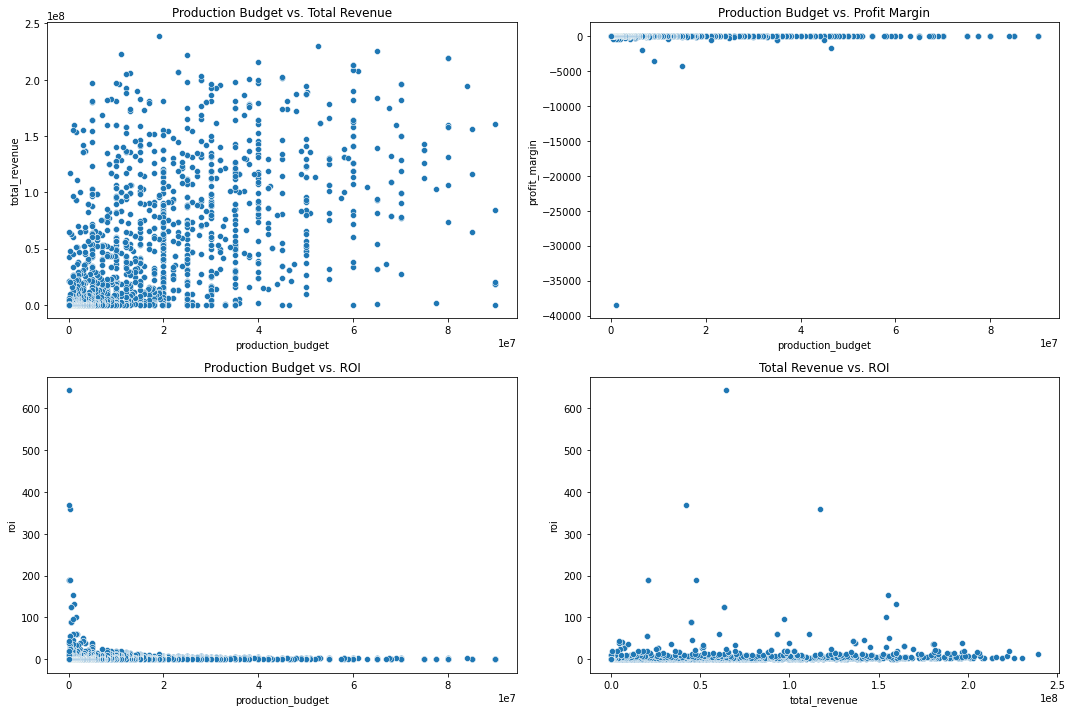

In [5]:
# Correlation matrix
corr = df_merged[['production_budget', 'total_revenue', 'profit_margin', 'roi']].corr()
display(corr)

# Scatter plots
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_merged, x='production_budget', y='total_revenue')
plt.title('Production Budget vs. Total Revenue')
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_merged, x='production_budget', y='profit_margin')
plt.title('Production Budget vs. Profit Margin')
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_merged, x='production_budget', y='roi')
plt.title('Production Budget vs. ROI')
plt.subplot(2, 2, 4)
sns.scatterplot(data=df_merged, x='total_revenue', y='roi')
plt.title('Total Revenue vs. ROI')
plt.tight_layout()
plt.show()

**Genre Analysis and Visualization**

Analyzing the performance of different genres using ROI and revenue metrics. Creating bar charts to visualize average ROI by genre and genre popularity over time.

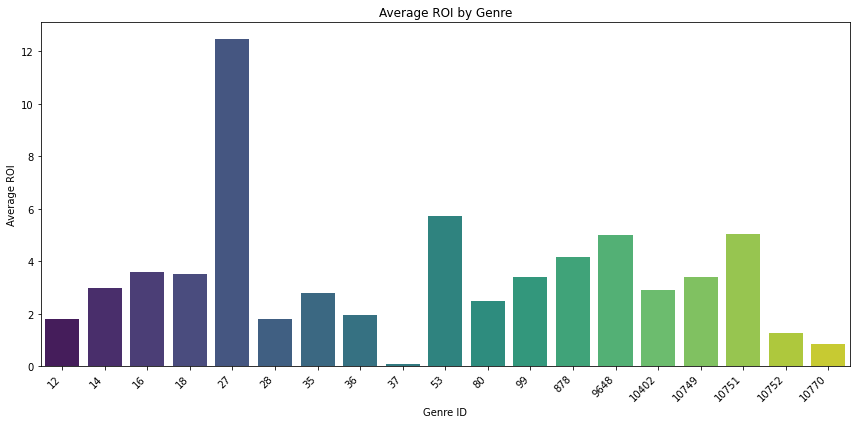

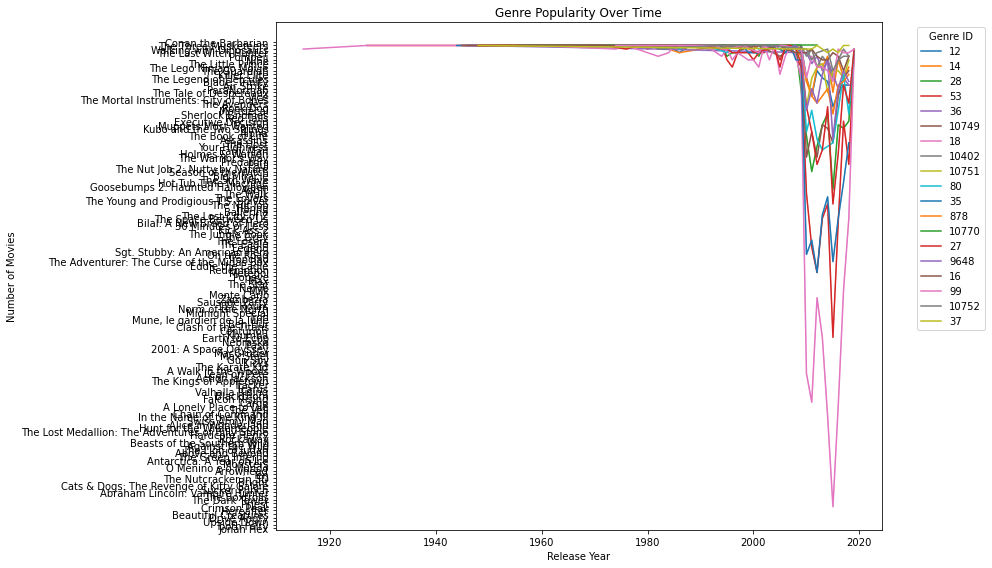

In [6]:
# Average ROI by genre
genre_roi = df_merged.explode('genre_ids_list').groupby('genre_ids_list')['roi'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_roi.index, y=genre_roi.values, palette='viridis')
plt.title('Average ROI by Genre')
plt.xlabel('Genre ID')
plt.ylabel('Average ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Genre popularity over time
df_merged['release_year'] = pd.to_datetime(df_merged['release_date_x'], errors='coerce').dt.year
plt.figure(figsize=(14, 8))
for genre_id in df_merged['genre_ids_list'].explode().unique():
    genre_movies = df_merged.explode('genre_ids_list').loc[df_merged.explode('genre_ids_list')['genre_ids_list'] == genre_id]
    sns.lineplot(x='release_year', y='movie', data=genre_movies, label=genre_id, estimator=len)
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Budget and Revenue Analysis**

Investigating the relationship between production budget and box office revenue. Using scatter plots and regression lines to visualize and interpret the results. Segment analysis by budget tiers.

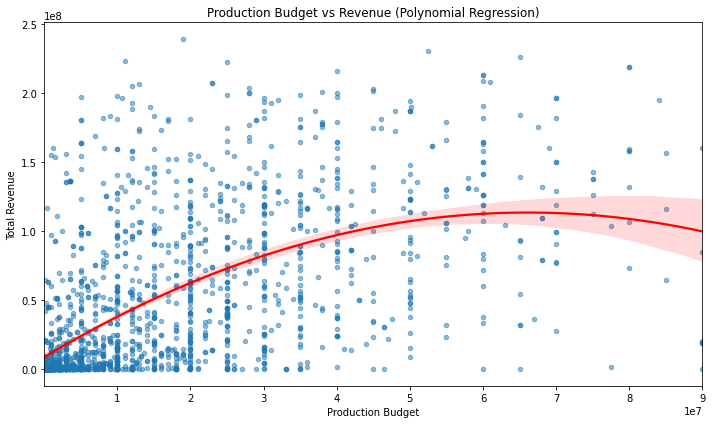

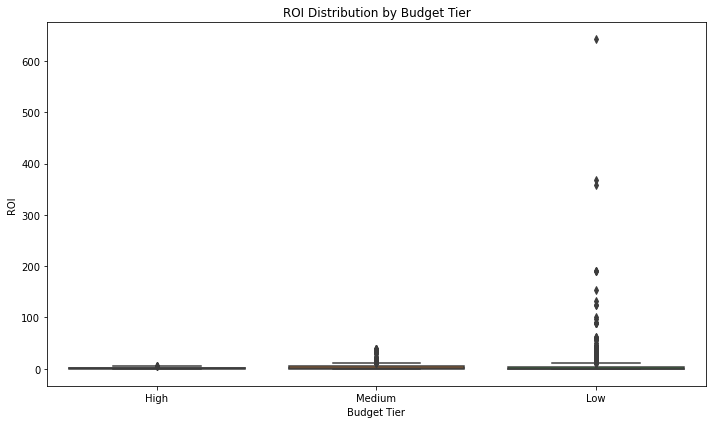

In [7]:
# Scatter plot with regression
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='total_revenue', data=df_merged, order=2, scatter_kws={'s': 20, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Production Budget vs Revenue (Polynomial Regression)')
plt.xlabel('Production Budget')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# ROI by budget tier
quartiles = df_merged['production_budget'].quantile([0.25, 0.5, 0.75])
def budget_tier(budget):
    if budget <= quartiles[0.25]:
        return 'Low'
    elif budget <= quartiles[0.75]:
        return 'Medium'
    else:
        return 'High'
df_merged['budget_tier'] = df_merged['production_budget'].apply(budget_tier)
plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_tier', y='roi', data=df_merged)
plt.title('ROI Distribution by Budget Tier')
plt.xlabel('Budget Tier')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

**Ratings and ROI Analysis**

Examining the impact of movie ratings on ROI and revenue. Creating scatter plots and calculating correlation coefficients. Segment analysis by budget or genre if relevant.

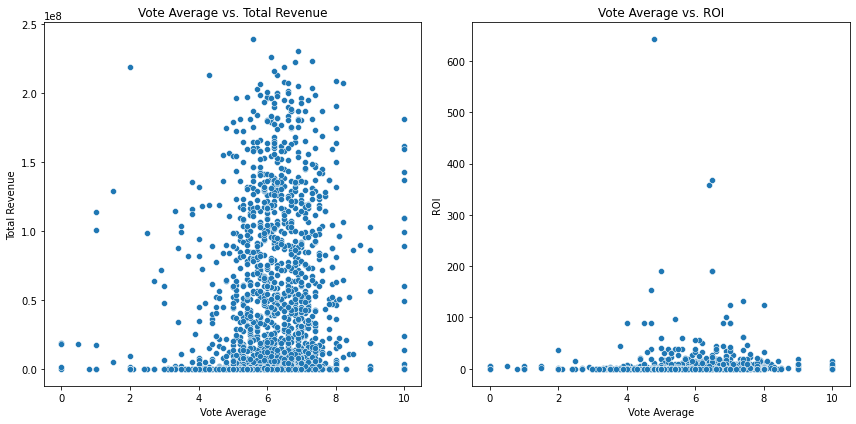

Correlation between Vote Average and Total Revenue: 0.159
Correlation between Vote Average and ROI: 0.021


In [8]:
# Scatter plots for ratings vs revenue/ROI
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_merged, x='vote_average', y='total_revenue')
plt.title('Vote Average vs. Total Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Total Revenue')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_merged, x='vote_average', y='roi')
plt.title('Vote Average vs. ROI')
plt.xlabel('Vote Average')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

# Correlation coefficients
correlation_rating_revenue = df_merged['vote_average'].corr(df_merged['total_revenue'])
correlation_rating_roi = df_merged['vote_average'].corr(df_merged['roi'])
print(f"Correlation between Vote Average and Total Revenue: {correlation_rating_revenue:.3f}")
print(f"Correlation between Vote Average and ROI: {correlation_rating_roi:.3f}")

**Temporal Trends in Movie Performance**

Analyzing trends in ROI and genre popularity over time using line plots and rolling averages. Identifying any seasonal or long-term patterns.

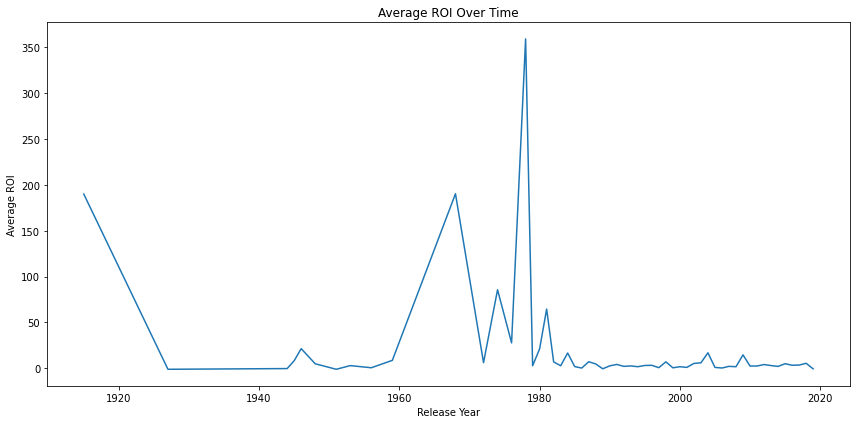

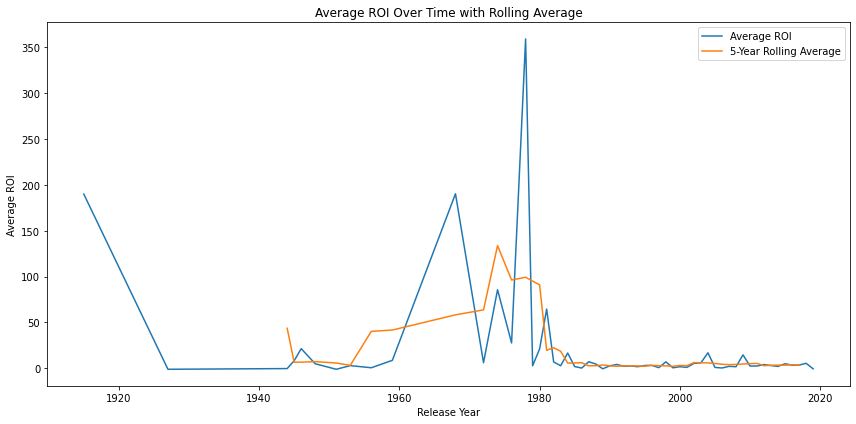

In [9]:
# ROI over time
roi_by_year = df_merged.groupby('release_year')['roi'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=roi_by_year.index, y=roi_by_year.values)
plt.title('Average ROI Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average ROI')
plt.tight_layout()
plt.show()

# Rolling average
rolling_avg_window = 5
rolling_avg = roi_by_year.rolling(window=rolling_avg_window, center=True).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=roi_by_year.index, y=roi_by_year.values, label='Average ROI')
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, label=f'{rolling_avg_window}-Year Rolling Average')
plt.title('Average ROI Over Time with Rolling Average')
plt.xlabel('Release Year')
plt.ylabel('Average ROI')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Visualization 
**Business Recommendations with Supporting Visualizations**

Presenting three concrete business recommendations based on the analysis. Supporting each recommendation with clear, well-formatted visualizations and concise explanations.

## Recommendation 1: Focus on High-ROI Genres

Certain genres consistently deliver higher average ROI. The studio should prioritize producing films in these genres to maximize profitability.


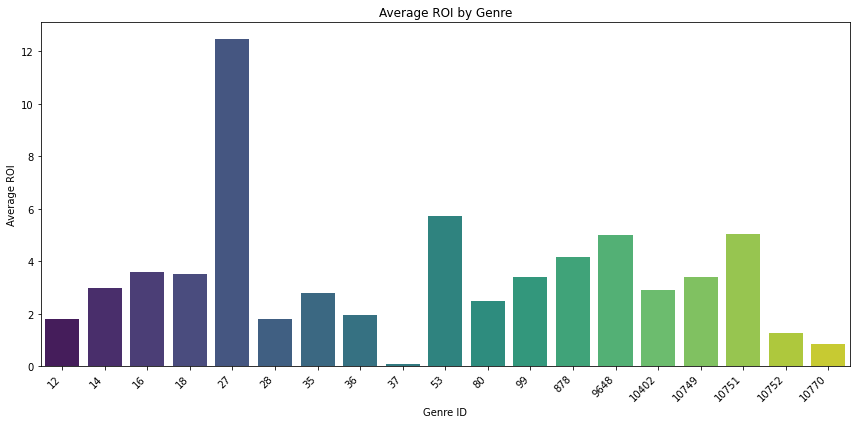

In [10]:
# Visualize average ROI by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_roi.index, y=genre_roi.values, palette='viridis')
plt.title('Average ROI by Genre')
plt.xlabel('Genre ID')
plt.ylabel('Average ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Recommendation 2: Optimize Production Budgets

Higher budgets do not guarantee higher ROI. The studio should carefully allocate budgets, targeting the "medium" tier for optimal balance between risk and reward.


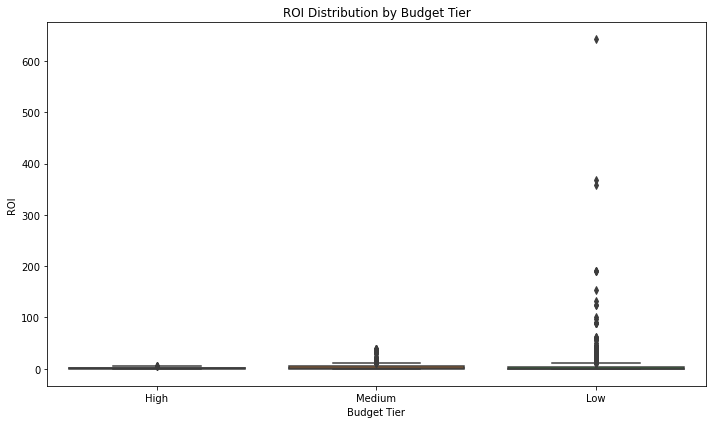

In [11]:
# Visualize ROI by budget tier
plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_tier', y='roi', data=df_merged)
plt.title('ROI Distribution by Budget Tier')
plt.xlabel('Budget Tier')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

## Recommendation 3: Leverage Ratings and Monitor Trends

While ratings have a weak correlation with ROI, higher-rated movies tend to earn more revenue. The studio should aim for quality to boost revenue and monitor temporal trends to capitalize on emerging genres.


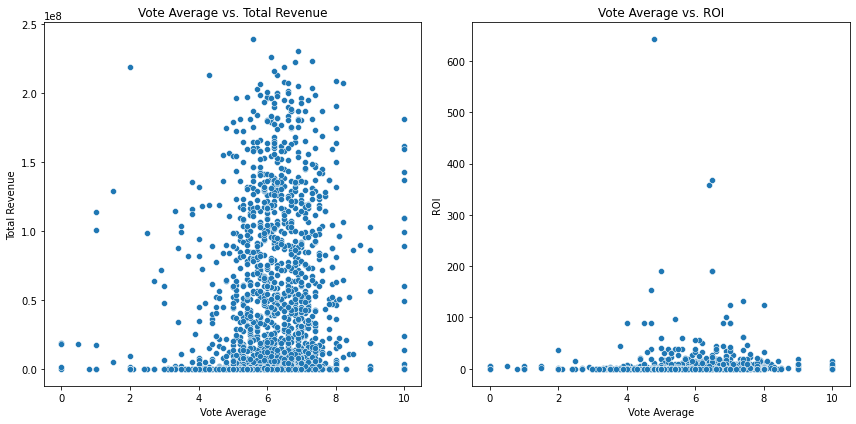

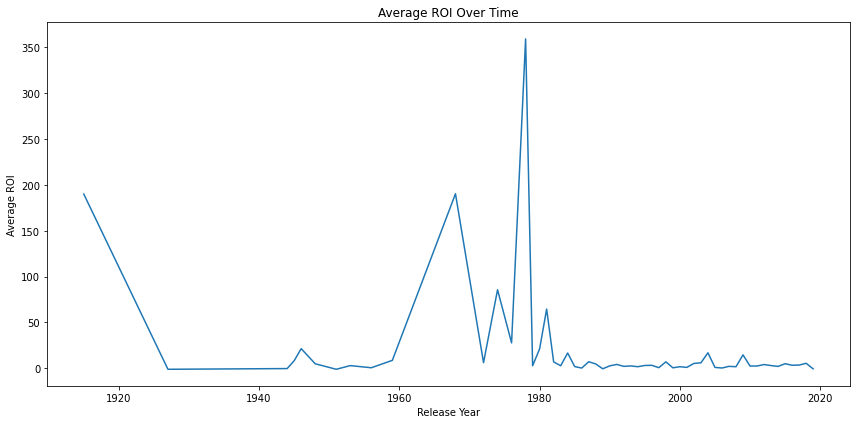

In [12]:
# Visualize ratings vs revenue and ROI
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_merged, x='vote_average', y='total_revenue')
plt.title('Vote Average vs. Total Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Total Revenue')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_merged, x='vote_average', y='roi')
plt.title('Vote Average vs. ROI')
plt.xlabel('Vote Average')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

# Visualize ROI trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=roi_by_year.index, y=roi_by_year.values)
plt.title('Average ROI Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average ROI')
plt.tight_layout()
plt.show()

---

# Summary

This analysis provides actionable insights for a new movie studio:

- **Target high-ROI genres** for production focus.
- **Optimize budget allocation** to maximize ROI, especially in the medium budget tier.
- **Aim for quality and monitor trends** to boost revenue and adapt to changing audience preferences.

## Detailed Explanation on Further Steps

**Targeted Genre Production:** 
Prioritize genres with consistently high ROI, considering the number of movies in each genre and their potential for profitability. Investigate the reasons for success in these genres further.

**Budget Allocation Strategy:** Refine the budget allocation strategy by segmenting movies by genre and performing more robust regression analysis to identify optimal budget levels for different genres. Consider other factors beyond budget, such as marketing and distribution
